In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
fruits_data = pd.read_table("../DataFiles/fruit_data_with_colors.txt")
fruits_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits_data.shape

(59, 7)

In [5]:
fruits_name_lookup = dict(zip(fruits_data.fruit_label.unique(),fruits_data.fruit_name.unique()))
fruits_name_lookup

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [6]:
X = fruits_data[['mass','width','height','color_score']]
y = fruits_data['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
X.shape,y.shape,X_train.shape,y_train.shape

((59, 4), (59,), (44, 4), (44,))

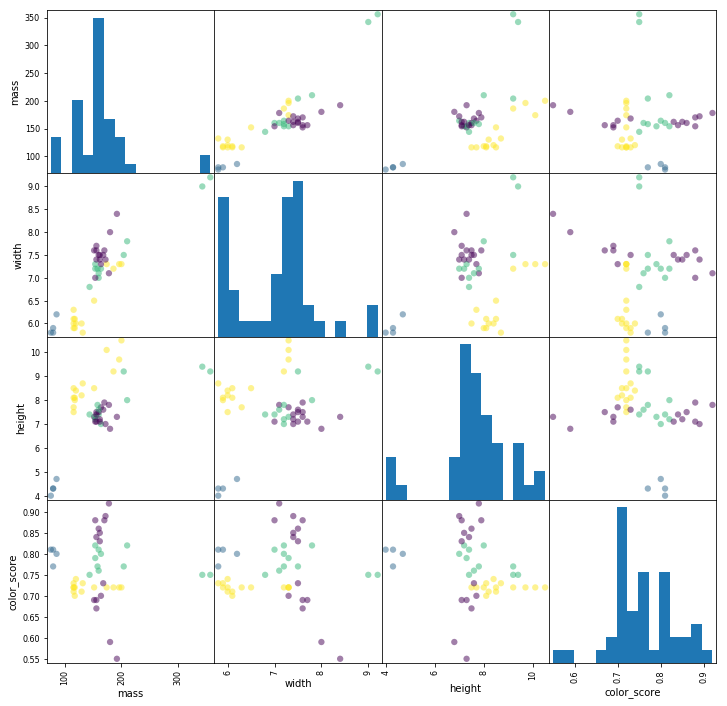

In [7]:
from pandas.plotting import scatter_matrix
# from matplotlib import cm
# cmap = cm.get_cmap('gnuplot')
# scatter = scatter_matrix(X_train,c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap)
scatter = scatter_matrix(X_train,c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(12,12))
plt.show() 

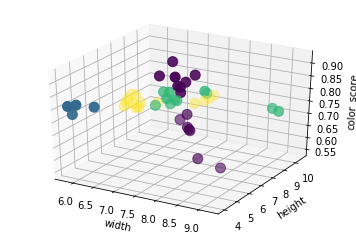

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [45]:
X = fruits_data[['mass','width','height']]
y = fruits_data['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
fruits_name_lookup[knn.predict([22,4.5,2.5])[0]]
knn.score(X_test,y_test)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.53333333333333333

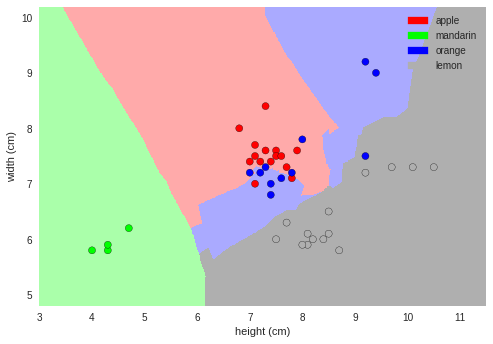

In [43]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train,y_train,5,'uniform')

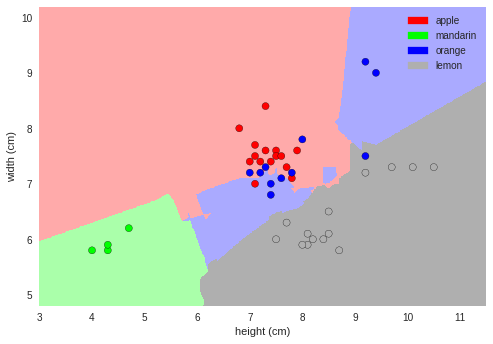

In [46]:
plot_fruit_knn(X_train,y_train,9,'uniform')

Accuracy with k = 1 is 0.6
Accuracy with k = 2 is 0.533333333333
Accuracy with k = 3 is 0.533333333333
Accuracy with k = 4 is 0.533333333333
Accuracy with k = 5 is 0.533333333333
Accuracy with k = 6 is 0.533333333333
Accuracy with k = 7 is 0.533333333333
Accuracy with k = 8 is 0.466666666667
Accuracy with k = 9 is 0.533333333333


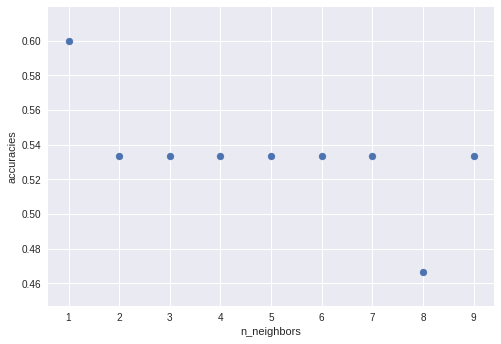

In [57]:
accuracies = []
n_neighbors_range = range(1,10)
for n in n_neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    accuracy = knn.score(X_test,y_test)
    accuracies.append(accuracy)
    print "Accuracy with k = %s is %s"%(str(n),str(accuracy))
# plt.figure()
plt.xlabel('n_neighbors')
plt.ylabel('accuracies')
plt.scatter(n_neighbors_range,accuracies)
plt.show()